## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

## Load data

In [2]:
df1 = pd.read_csv("CO2_emission_by_countries.csv", encoding='latin1')
df2 = pd.read_csv("global_air_pollution_dataset.csv")
df3 = pd.read_csv("continents_data.csv")

## Print all dataset structure

In [3]:
df1.describe()

,Year,CO2 emission (Tons),Population,Area
count,59620.000000,5.962000e+04,5.311600e+04,5.528400e+04
mean,1885.000000,1.034774e+09,3.992260e+07,6.522073e+05
std,78.231085,1.041652e+10,1.482365e+08,1.865483e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,1.770414e+06,1.770450e+04
50%,1885.000000,0.000000e+00,8.673095e+06,1.103815e+05
75%,1953.000000,8.715092e+06,2.862920e+07,4.925730e+05
max,2020.000000,4.170000e+11,1.425887e+09,1.709824e+07


In [4]:
df2.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [5]:
df3.describe()

,country-code,region-code,sub-region-code,intermediate-region-code
count,249.000000,248.000000,248.000000,107.000000
mean,433.835341,65.951613,179.866935,31.719626
std,252.980446,67.347832,138.334170,111.000322
min,4.000000,2.000000,15.000000,5.000000
25%,218.000000,9.000000,53.750000,11.000000
50%,434.000000,19.000000,154.000000,14.000000
75%,652.000000,142.000000,202.000000,29.000000
max,894.000000,150.000000,419.000000,830.000000


## Print all dataset information

In [6]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population           53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23

# Working on Dataset 1 - CO2 Emission over the world

In [7]:
df1.head(10)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population,Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
5,Afghanistan,AF,93,1755,0.0,41128771.0,652230.0,0.40%,63/km²
6,Afghanistan,AF,93,1756,0.0,41128771.0,652230.0,0.40%,63/km²
7,Afghanistan,AF,93,1757,0.0,41128771.0,652230.0,0.40%,63/km²
8,Afghanistan,AF,93,1758,0.0,41128771.0,652230.0,0.40%,63/km²
9,Afghanistan,AF,93,1759,0.0,41128771.0,652230.0,0.40%,63/km²


## Calculate the Custom Index for Dataset 1 - CO2 Emission

In [8]:
# Create Custom_Index column
df1['Custom_Index'] = df1['CO2 emission (Tons)'] / df1['Population'] / df1['Area']

# Handle NaN or inf values by replacing them with a default value (e.g., 0)
df1['Custom_Index'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Display the resulting filtered DataFrame
print(df1)

           Country Code Calling Code  Year  CO2 emission (Tons)  Population  \
0      Afghanistan   AF           93  1750                  0.0  41128771.0   
1      Afghanistan   AF           93  1751                  0.0  41128771.0   
2      Afghanistan   AF           93  1752                  0.0  41128771.0   
3      Afghanistan   AF           93  1753                  0.0  41128771.0   
4      Afghanistan   AF           93  1754                  0.0  41128771.0   
...            ...  ...          ...   ...                  ...         ...   
59615     Zimbabwe   ZW          263  2016          736467042.0  16320537.0   
59616     Zimbabwe   ZW          263  2017          746048675.0  16320537.0   
59617     Zimbabwe   ZW          263  2018          757903042.0  16320537.0   
59618     Zimbabwe   ZW          263  2019          768852126.0  16320537.0   
59619     Zimbabwe   ZW          263  2020          779383468.0  16320537.0   

           Area % of World Density(km2)  Custom_Ind

## Printing first 10 most polluted countries over the world

In [9]:
# Find the index of the row with the highest 'Custom_Index' for each country
max_custom_index_indices = df1.groupby('Country')['Custom_Index'].idxmax()

# Select rows based on the indices
countries_with_highest_custom_index = df1.loc[max_custom_index_indices]

# Sort the result by 'Custom_Index' in descending order
sorted_countries = countries_with_highest_custom_index.sort_values(by='Custom_Index', ascending=False)

# Print the result
print(sorted_countries[['Country', 'Custom_Index']].head(10))

                     Country  Custom_Index
37126                  Nauru     18.262221
40920                  Palau      1.274494
30351          Liechtenstein      0.971203
55825                 Tuvalu      0.948363
4335                 Bahrain      0.822461
32790                  Malta      0.620653
2167     Antigua and Barbuda      0.519428
45256  Saint Kitts and Nevis      0.509684
48237              Singapore      0.508405
33061       Marshall Islands      0.454114


## Plotting graphs

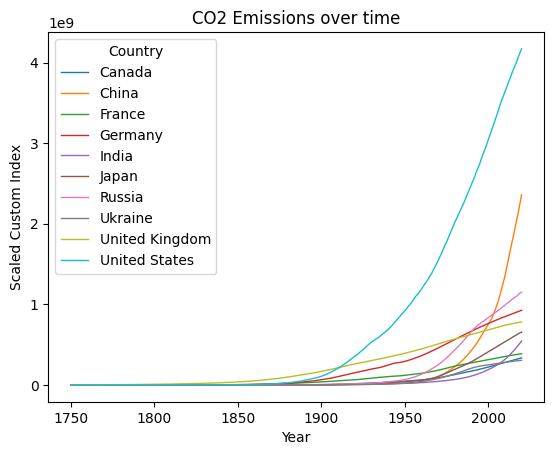

In [10]:
# Filter DataFrame for specific countries
selected_countries = ['Canada', 'China', 'France', 'Germany', 'India', 'Japan', 'Russia', 'Ukraine', 'United Kingdom', 'United States']
filtered_df = df1[df1['Country'].isin(selected_countries)]

# Create a pivot table
pivot_table = filtered_df.pivot_table(values='CO2 emission (Tons)', index='Year', columns='Country', aggfunc='mean')

# Scale the values (you can adjust the scaling factor)
scaled_pivot_table = pivot_table/100


# Plotting the graph
scaled_pivot_table.plot(kind='line',linewidth=1, linestyle='-', alpha=1)
plt.title('CO2 Emissions over time')
plt.xlabel('Year')
plt.ylabel('Scaled Custom Index')
plt.legend(title='Country')
plt.show()

# Working on Dataset 2 - 03 Emission over the world

In [11]:
df2.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


## Sorting unique countries with highest AQI value

In [12]:
# Find the index of the row with the highest 'Ozone_AQI' for each country
max_ozone_aqi_indices = df2.groupby('Country')['Ozone AQI Value'].idxmax()

# Select rows based on the indices
countries_with_highest_ozone_aqi = df2.loc[max_ozone_aqi_indices]

# Sort the result by 'Ozone_AQI' in descending order
sorted_countries = countries_with_highest_ozone_aqi.sort_values(by='Ozone AQI Value', ascending=False)

# Print the result - highest 10
print(sorted_countries[['Country', 'Ozone AQI Value', 'Ozone AQI Category']].head(10))

                          Country  Ozone AQI Value Ozone AQI Category
15603  Iran (Islamic Republic of)              235     Very Unhealthy
9634                        China              210     Very Unhealthy
12800                    Malaysia              209     Very Unhealthy
14630                   Indonesia              207     Very Unhealthy
19039                       India              205     Very Unhealthy
10812                    Pakistan              204     Very Unhealthy
18496                    Viet Nam              194          Unhealthy
3872         United Arab Emirates              170          Unhealthy
22425                       Qatar              164          Unhealthy
6610                       Kuwait              159          Unhealthy


## Plotting Graph

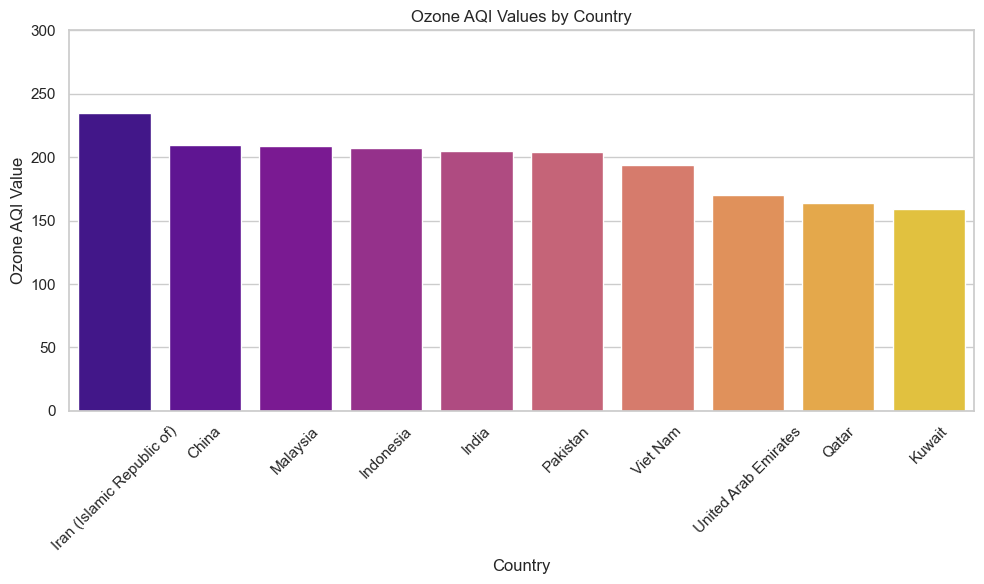

In [33]:
country_data =sorted_countries.head(10)


# Define a custom color palette
custom_palette = sns.color_palette("plasma", n_colors=len(country_data))



# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Country',hue='Country', y='Ozone AQI Value', data=country_data, palette=custom_palette)
plt.title('Ozone AQI Values by Country')
plt.xlabel('Country')
plt.ylabel('Ozone AQI Value')
plt.ylim(0, 300)  # Set the y-axis range from 0 to 300 (or adjust as needed)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()